Text(0, 0.5, 'p(x)')

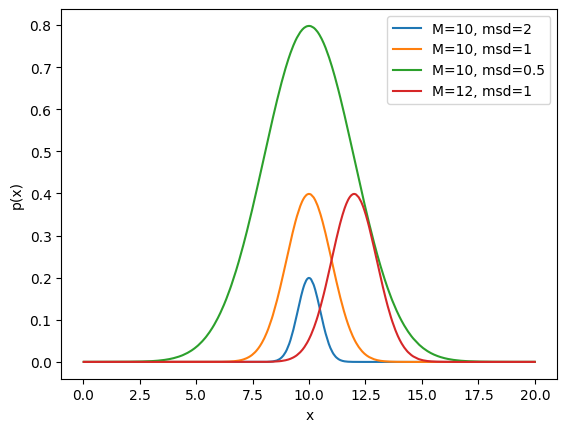

In [48]:
# Task 1
import random
import numpy as np
import matplotlib.pyplot as plt

# генерация СВ для заданий 1 и 2
def generation(N):
    x_arr = []
    for i in range(0,N):
        x_arr.append(random.uniform(0,20))
    x_arr.sort()
    return x_arr
    
# распределение плотности вероятности для нормального закона
def probability_density(x_arr, M, msd):
    p = []
    for i in range(0, len(x_arr)):
        p.append((1/(msd*((2*np.pi)**0.5)))*np.exp(-((x_arr[i]-M)**2)/2*(msd**2)))
    return p

x_arr = generation(500)
p_1 = probability_density(x_arr, 10, 2)
p_2 = probability_density(x_arr, 10, 1)
p_3 = probability_density(x_arr, 10, 0.5)
p_4 = probability_density(x_arr, 12, 1)

plt.plot(x_arr, p_1, label='M=10, msd=2')
plt.plot(x_arr, p_2, label='M=10, msd=1')
plt.plot(x_arr, p_3, label='M=10, msd=0.5')
plt.plot(x_arr, p_4, label='M=12, msd=1')
plt.legend()
plt.xlabel('x')
plt.ylabel('p(x)')

Функция распределения для нормального закона имеет вид:
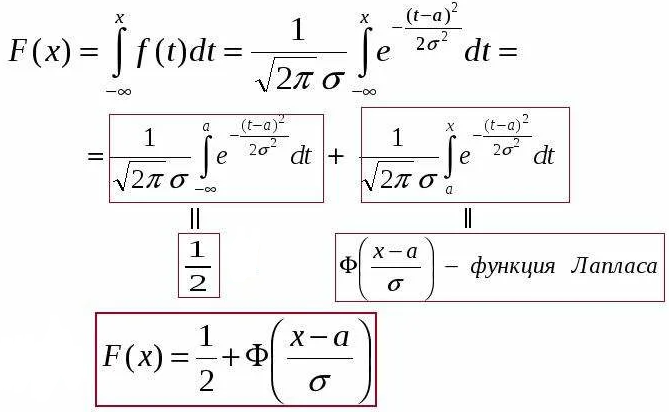
где Ф - функция Лапласа, а - мат. ожидание (М)

Text(0, 0.5, 'F(x)')

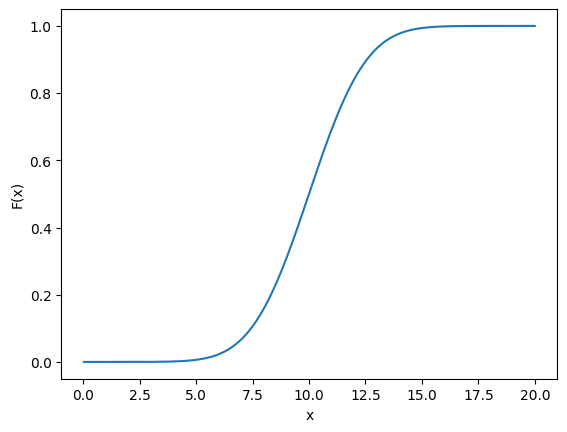

In [49]:
# Task 2
import scipy
def distribution(x_arr, M, msd):
    F = []
    for i in range(0,len(x_arr)):
        F.append(scipy.stats.norm.cdf((x_arr[i]-M)/msd))
    return F

# M=10, msd=2
F_task2 = distribution(x_arr, 10, 2)
plt.plot(x_arr, F_task2, label='M=10, msd=2')
plt.xlabel('x')
plt.ylabel('F(x)')

Моделирование нормального закона распределения с помощью метода обратной фунции:
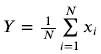 где  - случайная величина Х, распределённая по равномерному закону с параметрами 
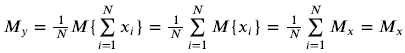
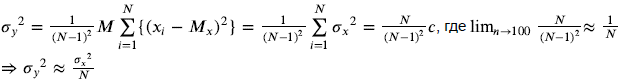

In [50]:
# Task 3
# моделирование нормального закона с помощью метода обратной функции
def modeling_nd_uf(M_y, msd_y, n, N):
    M_x = M_y
    msd_x = (n**0.5)*msd_y
    a = M_x - (3**0.5)*msd_x
    b = M_x + (3**0.5)*msd_x
    Y = [0 for i in range(N)]
    for i in range(0, N):
        for j in range(0, n):
            Y[i] = Y[i] + (a + np.random.rand()*(b - a))
        Y[i] = Y[i]/n
    return Y

In [54]:
#Функция, описывающая распределение СВ на отрезке от А до В с коэфф. деления К:
import math
def get_freq_distr(X, A, B, K):
    dY = (B-A)/K
    Freq = []
    for i in range(0, K):
        Freq.append(0)
    for j in range(0, len(X)):
        yC = X[j]
        fN = math.floor(yC/dY)
        Freq[fN] = Freq[fN] + 1
    for i in range(0, K):
        Freq[i] = (Freq[i]/(len(X)*dY))
    return Freq

#Интегральная вероятность для полученной частоты:
def get_integrated_freq(freq):
    integr_freq = []
    for i in range(0, len(freq)):
        integr_freq.append(sum(freq[0:i])/sum(freq))
    return integr_freq

In [55]:
# Математическое ожидание
M = 10
# Среднеквадратичное отклонение
msd = 2
# Левая граница интервала
A = 0
# Правая граница интервала
B = 20
# Количество интервалов
K = 100
# Количество эксперимантов
N = [10**2, 10**3, 10**4, 10**5, 10**6]
# Моделирование распределений
y, freq, integr_freq = [], [], []
for n in N:
    y.append(modeling_nd_uf(M, msd, K, n))
    freq.append(get_freq_distr(y[-1], A, B, K))
    integr_freq.append(get_integrated_freq(freq[-1]))

Text(0.5, 1.0, 'N = 10**6')

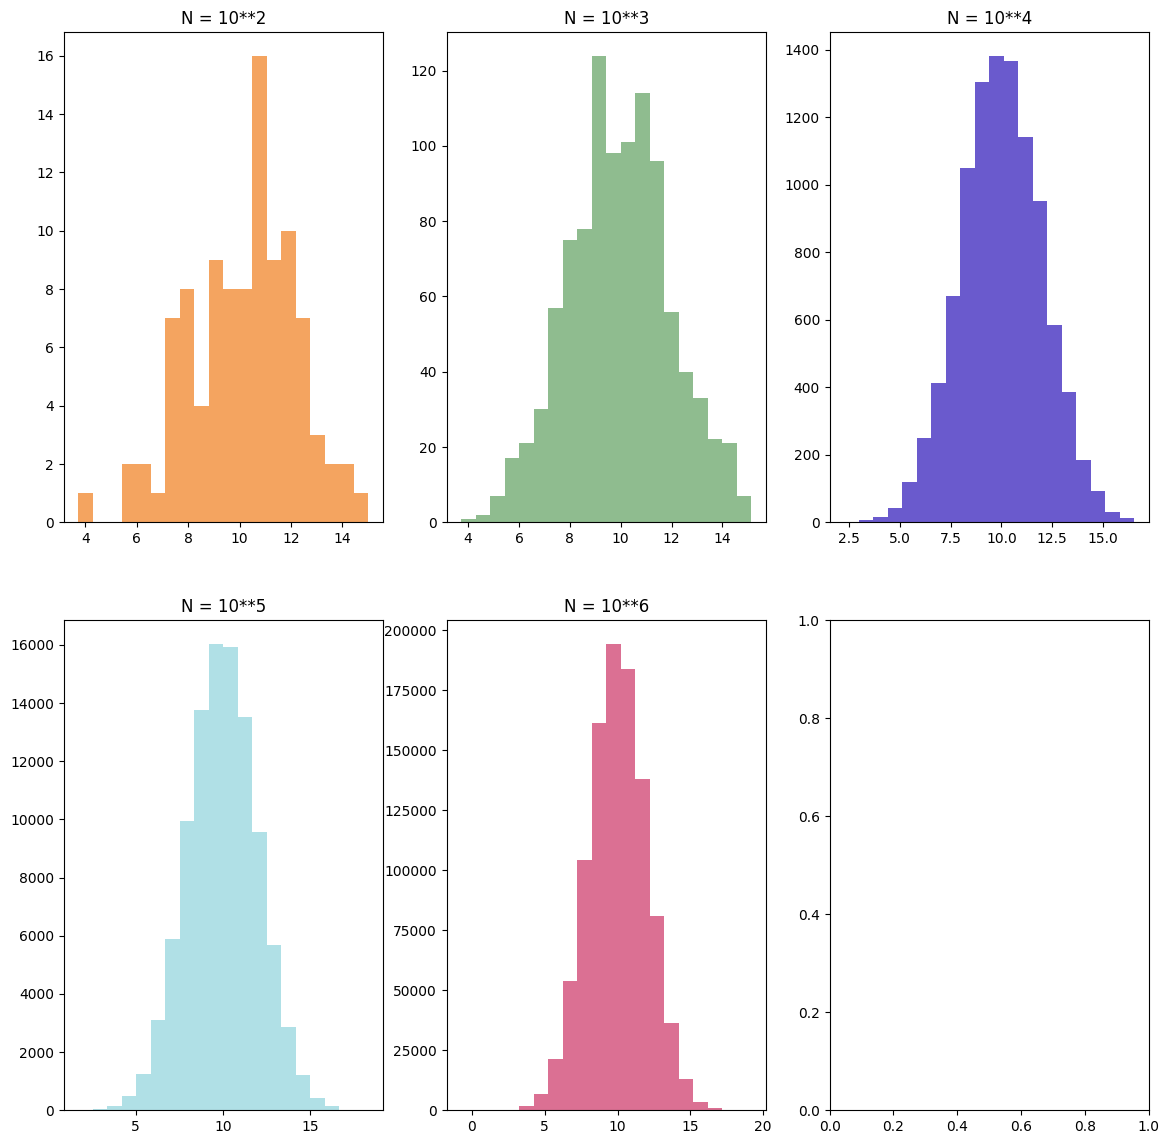

In [68]:
# Task 4
fig, axs = plt.subplots(2, 3, figsize=(14, 14))
axs[0,0].hist(y[0], 20, color='sandybrown')
axs[0,0].set_title("N = 10**2")
axs[0,1].hist(y[1], 20, color='darkseagreen')
axs[0,1].set_title("N = 10**3")
axs[0,2].hist(y[2], 20, color='slateblue')
axs[0,2].set_title("N = 10**4")
axs[1,0].hist(y[3], 20, color='powderblue')
axs[1,0].set_title("N = 10**5")
axs[1,1].hist(y[4], 20, color='palevioletred')
axs[1,1].set_title("N = 10**6")

Text(0.5, 1.0, 'N = 10**6')

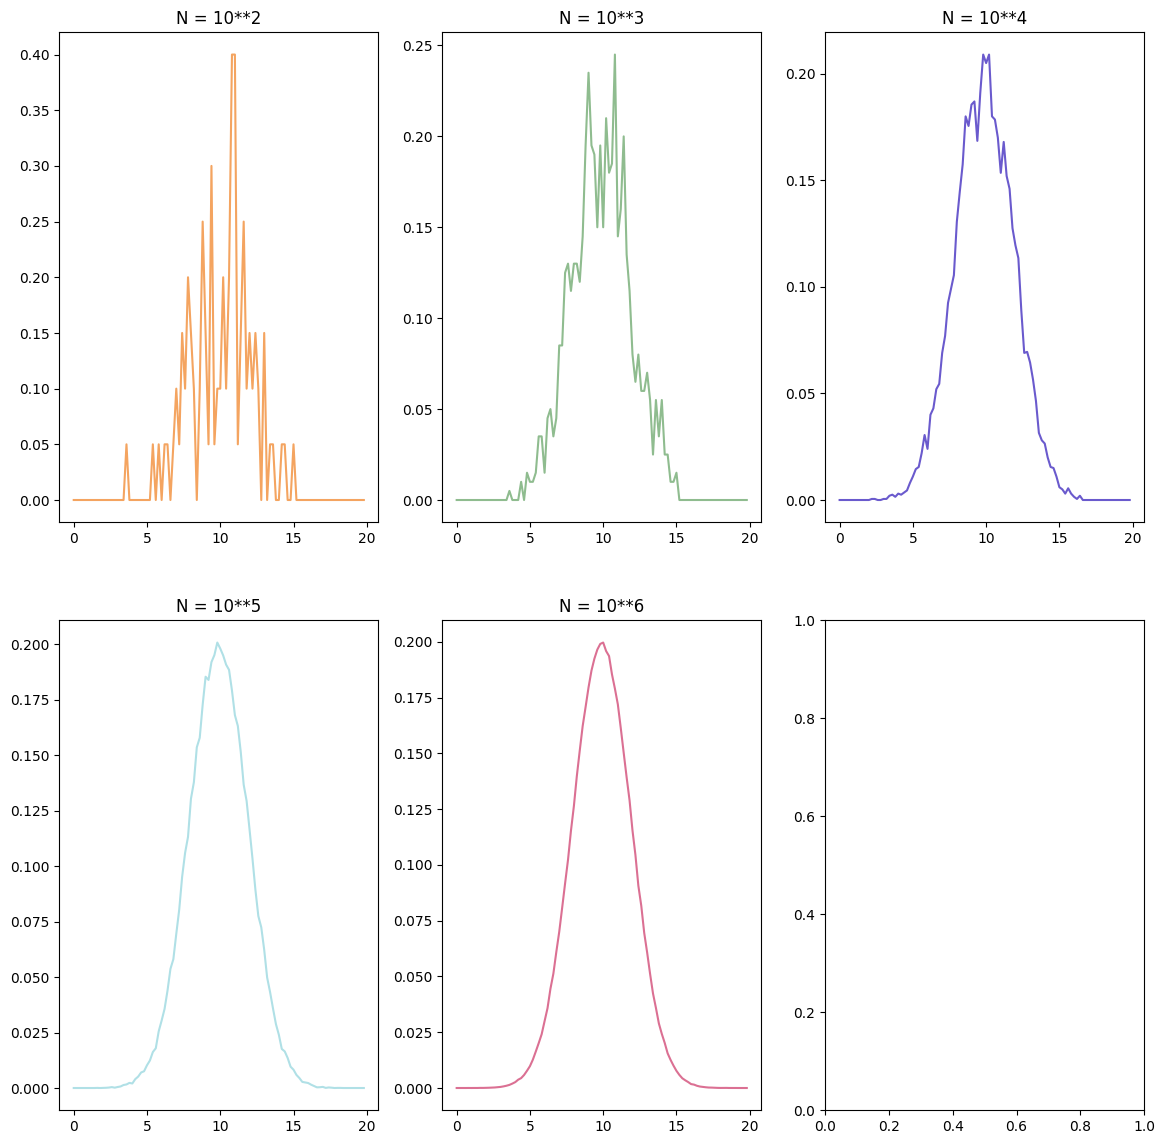

In [70]:
# Построение кусочно-линейной функции для плотности распределения каждого из n:
x = []
for i in range(A, K):
    x.append(i * ((A + B)/K))
    
fig, axs = plt.subplots(2, 3, figsize=(14, 14))
axs[0,0].plot(x, freq[0], color='sandybrown')
axs[0,0].set_title("N = 10**2")
axs[0,1].plot(x, freq[1], color='darkseagreen')
axs[0,1].set_title("N = 10**3")
axs[0,2].plot(x, freq[2], color='slateblue')
axs[0,2].set_title("N = 10**4")
axs[1,0].plot(x, freq[3], color='powderblue')
axs[1,0].set_title("N = 10**5")
axs[1,1].plot(x, freq[4], color='palevioletred')
axs[1,1].set_title("N = 10**6")

Text(0.5, 1.0, 'N = 10**6')

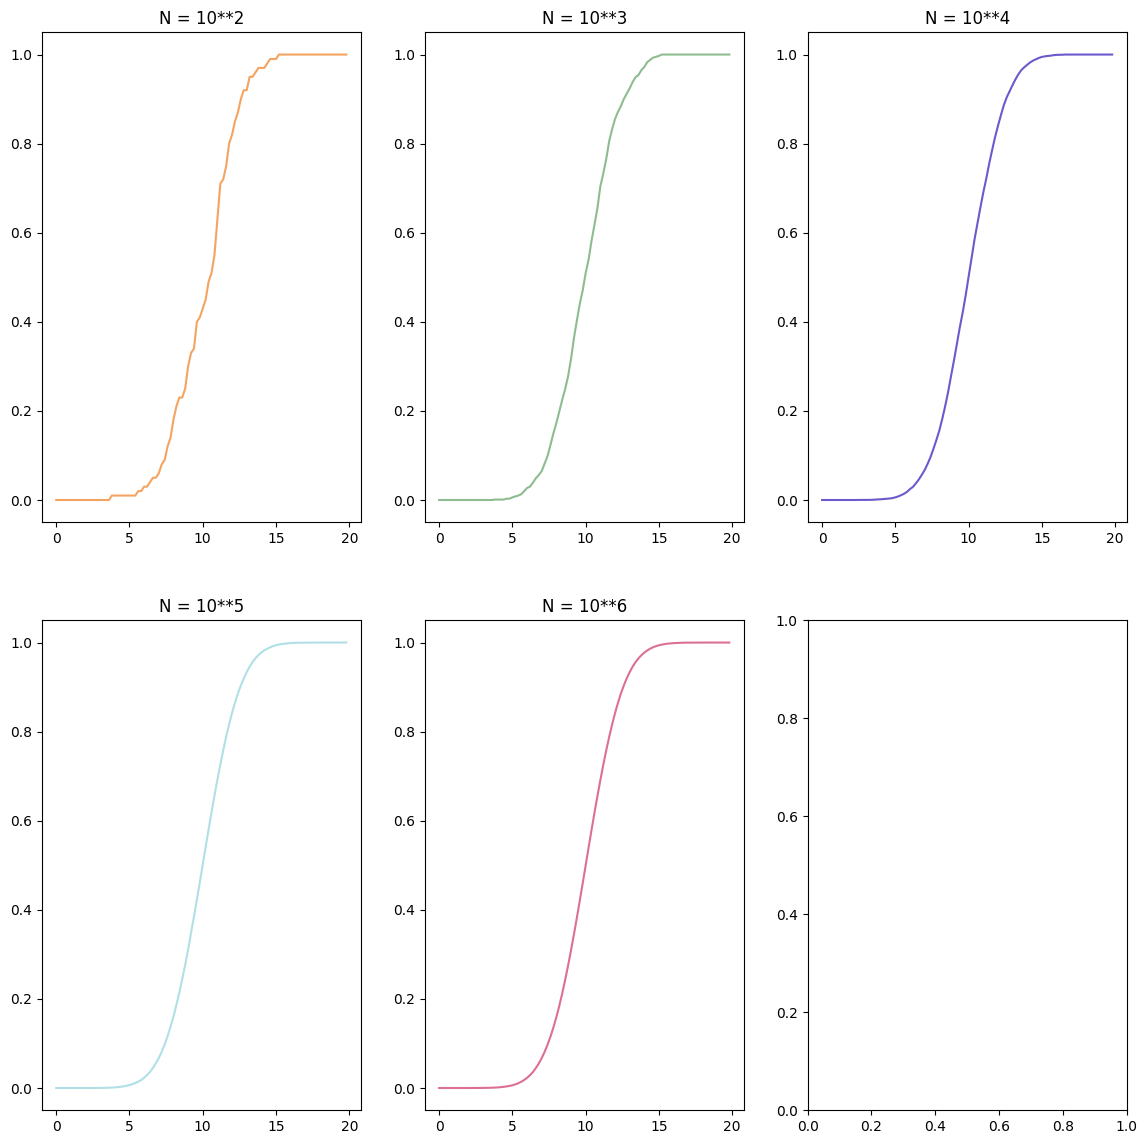

In [71]:
# Построение кусочно-линейной функции для интегральной функции каждого из n:
fig, axs = plt.subplots(2, 3, figsize=(14, 14))
axs[0,0].plot(x, integr_freq[0], color='sandybrown')
axs[0,0].set_title("N = 10**2")
axs[0,1].plot(x, integr_freq[1], color='darkseagreen')
axs[0,1].set_title("N = 10**3")
axs[0,2].plot(x, integr_freq[2], color='slateblue')
axs[0,2].set_title("N = 10**4")
axs[1,0].plot(x, integr_freq[3], color='powderblue')
axs[1,0].set_title("N = 10**5")
axs[1,1].plot(x, integr_freq[4], color='palevioletred')
axs[1,1].set_title("N = 10**6")

In [72]:
# Task 5
M_x, msd_x, eps_M_x, eps_msd_x = [], [], [], []
for i, n in enumerate(N):
    M_x.append(sum(y[i])/n)
    msd_x.append(((sum([x**2 for x in y[i]])/n - M_x[-1]**2)*(n/(n-1)))**0.5)
    eps_M_x.append(abs((M - M_x[-1])/M)*100)
    eps_msd_x.append(abs((msd - msd_x[-1])/msd)*100)
    k = i+2
    print(f'N=10**{k}:\n M{k-1} = {M_x[-1]}, eps_M_x{k-1} = {eps_M_x[-1]},\n msd{k-1} = {msd_x[-1]}, eps_msd_x{k-1} = {eps_msd_x[-1]}')

N=10**2:
 M1 = 10.139226384221187, eps_M_x1 = 1.3922638422118716,
 msd1 = 2.0906233607380664, eps_msd_x1 = 4.531168036903321
N=10**3:
 M2 = 9.949987286385996, eps_M_x2 = 0.5001271361400406,
 msd2 = 2.00805843476846, eps_msd_x2 = 0.40292173842300105
N=10**4:
 M3 = 9.994256458241063, eps_M_x3 = 0.057435417589370985,
 msd3 = 2.002967434547224, eps_msd_x3 = 0.1483717273611962
N=10**5:
 M4 = 9.989669872051376, eps_M_x4 = 0.10330127948623868,
 msd4 = 2.0021385670192755, eps_msd_x4 = 0.10692835096377529
N=10**6:
 M5 = 9.997422547798829, eps_M_x5 = 0.025774522011712264,
 msd5 = 2.0008926669531935, eps_msd_x5 = 0.04463334765967275


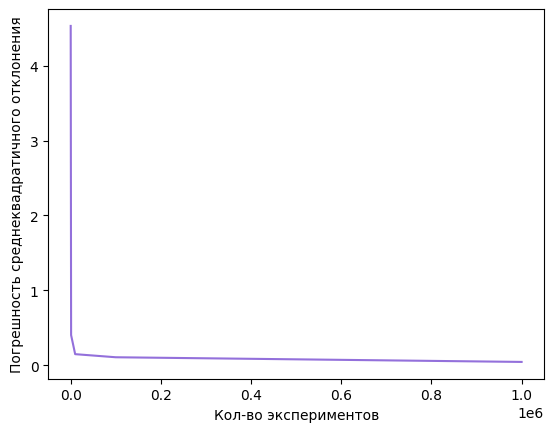

In [77]:
# График зависимости средней квадратичной погрешности от числа экспериментов:
plt.plot(N, eps_msd_x, color='mediumpurple')
plt.xlabel('Кол-во экспериментов')
plt.ylabel('Погрешность среднеквадратичного отклонения')
plt.show()